In [1]:
import os
import math
from collections import defaultdict
from typing import List 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', palette='Paired', font_scale=1.3)

In [2]:
PROJECT_FOLDER = os.path.dirname(os.path.abspath(''))
DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data')

KB = float(1024)
MB = float(KB ** 2)

def load_results_df(file_path: str):
    df = pd.read_csv(file_path)
    df['model_size [MB]'] = df['model_size']/MB
    return df

titlesize = 16

def plot_varaible(data, x, y, order, title='', remove_xticks=False,
                  xlabel=None, ylabel=None, ax=None):
    ax = sns.barplot(x=x, y=y, order=order, data=data, ax=ax)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if remove_xticks:   
        ax.set_xticklabels([])
    ax.set_title(title, fontsize=titlesize)

def visualize_models(df: pd.DataFrame, models: List[str], suptitle: str = ''):
    
    cols_to_plot = ['accuracy', 'macro avg_f1-score', 'macro avg_recall', 
                    'macro avg_precision', 'training_time', 'eval_time', 'model_size']
    
    df = df[df['model_name'].isin(models)].copy()
    
    fig = plt.figure(constrained_layout=False, figsize=(12, 8))
    gs = fig.add_gridspec(2, 3)
    
    # Plot measures
    
    ax1 = fig.add_subplot(gs[0, :])
    
    id_cols = ['name', 'model_name', 'task_name']   
    measures_to_plot = ['accuracy', 'macro avg_f1-score', 'macro avg_recall', 
                    'macro avg_precision']
    x_ticks_labels = [col.replace('_',' ').replace('-',' ').capitalize()
                      for col in measures_to_plot]
    
    df_measures = pd.melt(df, id_vars=id_cols, value_vars=measures_to_plot)
    
    sns.barplot(x='variable', y='value', hue='model_name', hue_order=models, 
                data=df_measures, ax=ax1)
    
    ax1.set_ylim(bottom=df_measures['value'].min()-0.1)
    ax1.set_xticklabels(x_ticks_labels)
    ax1.set_xlabel('Measure')
    ax1.set_title('Results', fontsize=titlesize)
    ax1.set_ylabel('Value')
    
    bbox_to_anchor=(0.5, 1.6)
    ax1.legend(title='Model', bbox_to_anchor=(1.02, 0.5), loc=2, borderaxespad=0.)
    
    ax2 = fig.add_subplot(gs[1, 0])
    plot_varaible(df, y='training_time', x='model_name', order=models, remove_xticks=True,
                  xlabel='Model', ylabel='Time [s]', title ='Training time', ax=ax2)
    
    ax3 = fig.add_subplot(gs[1, 1])
    plot_varaible(df, y='eval_time', x='model_name', order=models, remove_xticks=True,
                  xlabel='Model', ylabel='Time [s]', title = 'Eval time', ax=ax3)
    
    ax4 = fig.add_subplot(gs[1, 2])
    

    
    plot_varaible(df, y='model_size [MB]', x='model_name', order=models, remove_xticks=True,
                  xlabel='Model', ylabel='Size [MB]', title = 'Model size', ax=ax4)
    
    fig.suptitle(suptitle)
    fig.tight_layout()

# Multiemo EN - All sentences

In [3]:
file_name = 'results-multiemo_en_all_sentence.csv'
file_path = os.path.join(DATA_FOLDER, file_name)

df = load_results_df(file_path)

cols_to_display = ['task_name', 'model_name', 'accuracy', 'macro avg_f1-score', 'macro avg_recall', 
                    'macro avg_precision', 'training_time', 'eval_time', 'model_size [MB]']
df[cols_to_display]

,task_name,model_name,accuracy,macro avg_f1-score,macro avg_recall,macro avg_precision,training_time,eval_time,model_size [MB]
0,multiemo_en_all_sentence,distilbert-base-uncased,0.779286,0.741776,0.740405,0.743439,2566.470919,24.098655,255.457139
1,multiemo_en_all_sentence,bert-base-multilingual-cased,0.764143,0.721772,0.717098,0.728474,5324.377136,54.352554,678.548993
2,multiemo_en_all_sentence,bert-base-uncased,0.791471,0.750271,0.742138,0.763748,5030.124383,49.763504,417.733563
3,multiemo_en_all_sentence,distilroberta-base,0.790775,0.747665,0.736346,0.769523,2562.716114,23.862186,313.312604
4,multiemo_en_all_sentence,roberta-base,0.369539,0.134914,0.250000,0.092385,5016.242405,46.823688,475.578534
5,multiemo_en_all_sentence,distilbert-base-multilingual-cased,0.761010,0.722560,0.717686,0.728861,2733.752610,26.378126,516.272569


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    6 non-null      object 
 1   model_name              6 non-null      object 
 2   task_name               6 non-null      object 
 3   epochs                  6 non-null      int64  
 4   batch_size              6 non-null      int64  
 5   learning_rate           6 non-null      float64
 6   weight_decay            6 non-null      float64
 7   warmup_steps            6 non-null      int64  
 8   max_seq_length          6 non-null      int64  
 9   training_time           6 non-null      float64
 10  accuracy                6 non-null      float64
 11  eval_time               6 non-null      float64
 12  z_amb_precision         6 non-null      float64
 13  z_amb_recall            6 non-null      float64
 14  z_amb_f1-score          6 non-null      float6

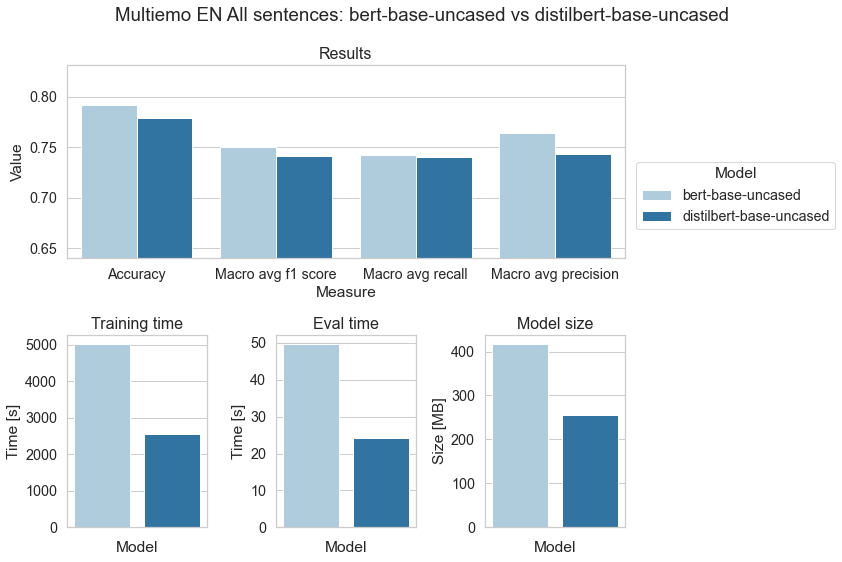

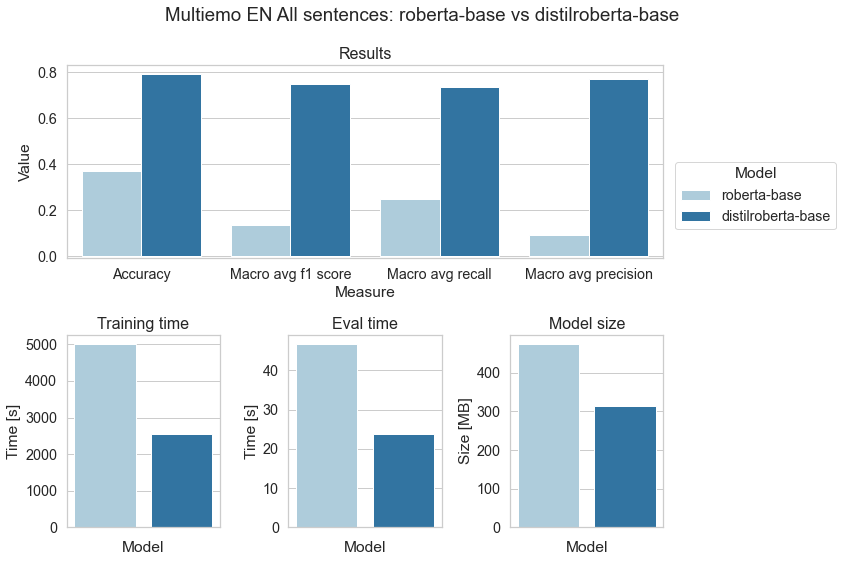

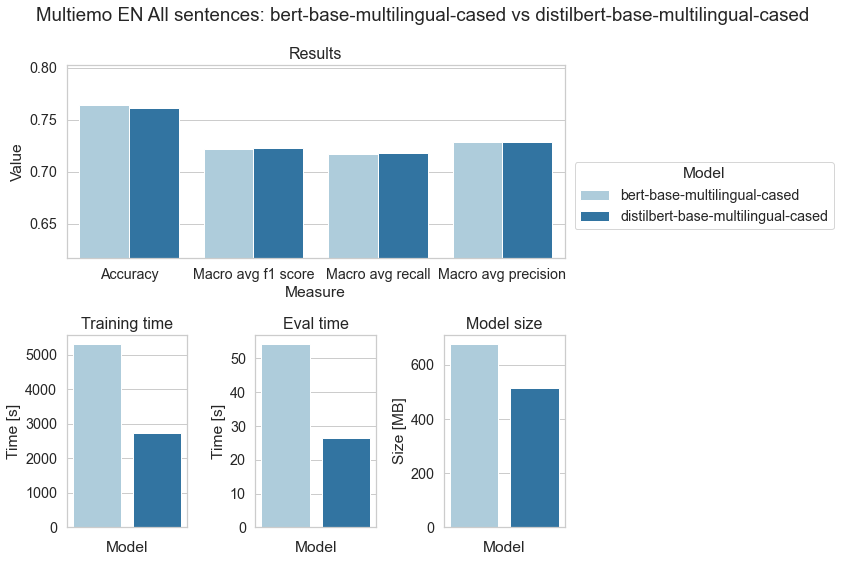

In [5]:
model_pairs = [['bert-base-uncased', 'distilbert-base-uncased'],
               ['roberta-base', 'distilroberta-base'],
               ['bert-base-multilingual-cased', 'distilbert-base-multilingual-cased']]

for models in model_pairs:
    visualize_models(df, models, suptitle='Multiemo EN All sentences: ' + ' vs '.join(models))

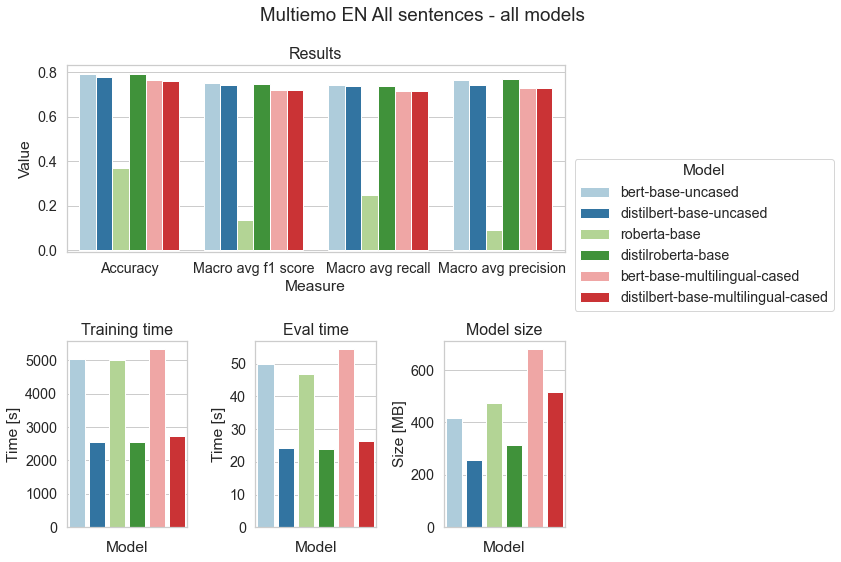

In [6]:
models = ['bert-base-uncased', 'distilbert-base-uncased',
          'roberta-base', 'distilroberta-base',
          'bert-base-multilingual-cased', 'distilbert-base-multilingual-cased']
visualize_models(df, models, suptitle='Multiemo EN All sentences - all models')

# Multiemo PL - All sentences

In [7]:
file_name = 'results-multiemo_pl_all_sentence.csv'
file_path = os.path.join(DATA_FOLDER, file_name)

df = load_results_df(file_path)

cols_to_display = ['task_name', 'model_name', 'accuracy', 'macro avg_f1-score', 'macro avg_recall', 
                    'macro avg_precision', 'training_time', 'eval_time', 'model_size [MB]']
df[cols_to_display]

,task_name,model_name,accuracy,macro avg_f1-score,macro avg_recall,macro avg_precision,training_time,eval_time,model_size [MB]
0,multiemo_pl_all_sentence,bert-base-multilingual-cased,0.746562,0.704151,0.697358,0.716215,6320.268218,69.591829,678.548993
1,multiemo_pl_all_sentence,distilbert-base-multilingual-cased,0.748651,0.702641,0.686416,0.740210,2879.252849,31.055493,516.272569


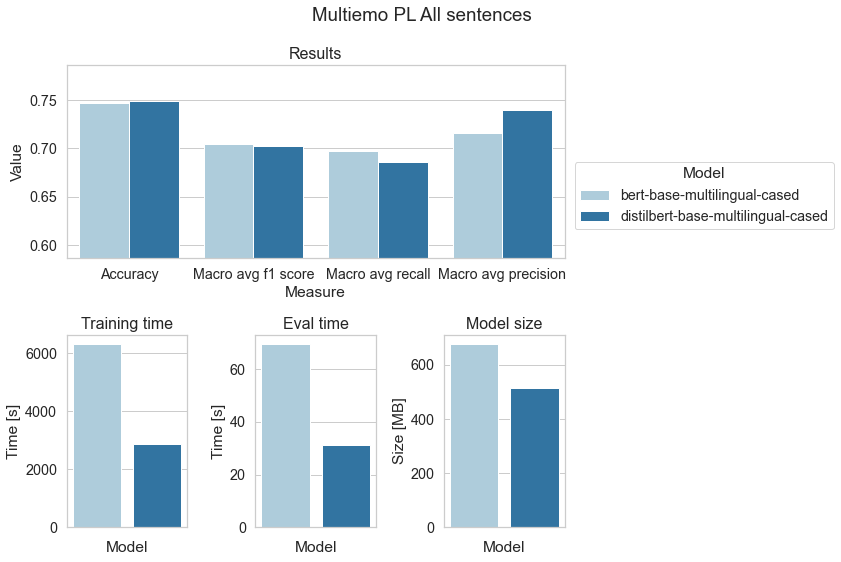

In [8]:
models = ['bert-base-multilingual-cased', 'distilbert-base-multilingual-cased']
visualize_models(df, models, suptitle='Multiemo PL All sentences')